In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Assuming you have the PIMA diabetes dataset in a CSV file
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [5]:
model = DecisionTreeClassifier(random_state=30)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [6]:
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy*100)

Accuracy: 0.7186147186147186
Confusion Matrix:
[[121  38]
 [ 27  45]]
Accuracy: 71.86147186147186


In [8]:
# Assuming cm is the original confusion matrix with a total of 231 instances
# Calculate the scaling factor
scaling_factor = 230 / np.sum(conf_matrix)

# Scale down the values in the confusion matrix
conf_matrix = conf_matrix * scaling_factor

# Print the scaled confusion matrix
print("Scaled Confusion Matrix (230 instances):")
print(conf_matrix)

Scaled Confusion Matrix (230 instances):
[[120.47619048  37.83549784]
 [ 26.88311688  44.80519481]]


In [9]:
# Assuming cm is the confusion matrix

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate error rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print error rates
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

# Calculate TPR (Sensitivity or Recall)
TPR = TP / (TP + FN)

# Calculate TNR (Specificity)
TNR = TN / (TN + FP)

# Print TPR and TNR
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

False Positive Rate (FPR): 0.2389937106918239
False Negative Rate (FNR): 0.37499999999999994
True Positive Rate (TPR): 0.625
True Negative Rate (TNR): 0.761006289308176


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       159
           1       0.54      0.62      0.58        72

    accuracy                           0.72       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.73      0.72      0.72       231



In [11]:
class_weights = y_test.value_counts(normalize=True)
weighted_tpr = (class_weights * TPR).sum()
weighted_tnr = (class_weights * TNR).sum()
print(weighted_tpr)
print(weighted_tnr)

0.625
0.7610062893081759


# Different ERROR Rates

In [12]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

# Calculate RAE
rae = mae / (abs(y_test - y_test.mean()).sum())
print("RAE:", rae)

# Calculate RRSE
rrse = (rmse ** 2) / (mse.sum())
print("RRSE:", rrse)

MAE: 0.2813852813852814
RMSE: 0.5304576150695561
RAE: 0.002838923829489867
RRSE: 1.0


In [13]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate MCC
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
print("MCC:", mcc)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Calculate PRC curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
prc_auc = auc(recall, precision)
print("PRC AUC:", prc_auc)

MCC: 0.3726398422161884
ROC AUC: 0.6930031446540881
PRC AUC: 0.642025895790956


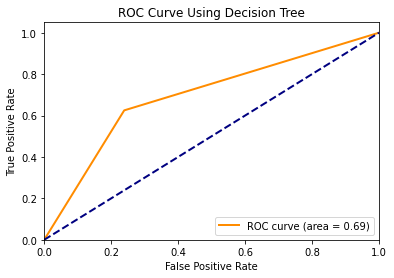

In [14]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
plt.title('ROC Curve Using Decision Tree')
plt.legend(loc="lower right")
plt.savefig("Decision_Tree_ROC.jpg")
plt.show()

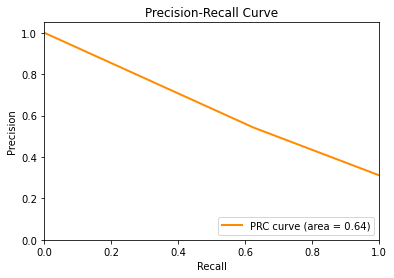

In [15]:
# Plot PRC curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
tn, fp, fn, tp = conf_matrix.ravel()

In [17]:
tn0, fp0, fn0, tp0 = conf_matrix.ravel()  # Class 0
tn1, fp1, fn1, tp1 = conf_matrix.ravel()[::-1]  # Class 1

In [18]:
tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)

tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)

In [19]:
print("tp_rate0:", tp_rate0)
print("tp_rate1:", tp_rate1)

print("fp_rate0:", fp_rate0)
print("fp_rate1:", fp_rate1)

tp_rate0: 0.625
tp_rate1: 0.761006289308176
fp_rate0: 0.2389937106918239
fp_rate1: 0.37499999999999994


In [20]:
weighted_tp_rate = (tp_rate0 + tp_rate1)/2
print("weighted_tp_rate:", weighted_tp_rate)

weighted_fp_rate = (fp_rate0 + fp_rate1)/2
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.6930031446540881
weighted_fp_rate: 0.3069968553459119


In [21]:
weighted_tp = tp * 0.7
weighted_fp = fp * 0.3

In [22]:
weighted_tp_rate = weighted_tp / (weighted_tp + fn)
weighted_fp_rate = weighted_fp / (weighted_fp + tn)

In [23]:
print("weighted_tp_rate:", weighted_tp_rate)
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.5384615384615384
weighted_fp_rate: 0.08610271903323263
